# Yellow Taxi Trip Analysis

## Data Loading

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!if not exist ".\data\" mkdir data

!curl -o ".\data\yellow_tripdata_2024-01.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet"
!curl -o ".\data\yellow_tripdata_2024-02.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-02.parquet"
!curl -o ".\data\yellow_tripdata_2024-03.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-03.parquet"
!curl -o ".\data\yellow_tripdata_2024-04.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-04.parquet"
!curl -o ".\data\yellow_tripdata_2024-05.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-05.parquet"
!curl -o ".\data\yellow_tripdata_2024-06.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-06.parquet"
!curl -o ".\data\yellow_tripdata_2024-07.parquet" "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-07.parquet"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 47.6M    0  222k    0     0   168k      0  0:04:49  0:00:01  0:04:48  168k
  8 47.6M    8 4031k    0     0  1603k      0  0:00:30  0:00:02  0:00:28 1604k
 24 47.6M   24 11.7M    0     0  3521k      0  0:00:13  0:00:03  0:00:10 3521k
 42 47.6M   42 20.2M    0     0  4763k      0  0:00:10  0:00:04  0:00:06 4764k
 61 47.6M   61 29.2M    0     0  5546k      0  0:00:08  0:00:05  0:00:03 5906k
 81 47.6M   81 38.9M    0     0  6314k      0  0:00:07  0:00:06  0:00:01 7940k
 99 47.6M   99 47.6M    0     0  6658k      0  0:00:07  0:00:07 --:--:-- 9301k
100 47.6M  100 47.6M    0     0  6660k      0  0:00:07  0:00:07 --:--:-- 9380k
  % Total    % Received % Xferd  Average Speed   Ti

In [2]:
total_df = None
for idx in range(1, 8):
    df = pd.read_parquet(f".\data\yellow_tripdata_2024-{idx:02}.parquet", engine="pyarrow")
    if total_df is None:
        total_df = df
        continue
    total_df = pd.concat([total_df, df], axis=0, ignore_index=True)
print(total_df.shape)
print(total_df.head())

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sunsh\AppData\Local\Temp\ipykernel_30968\56288264.py:3: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_parquet(f".\data\yellow_tripdata_2024-{idx:02}.parquet", engine="pyarrow")


(23408996, 19)
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0   
1         1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0   
2         1  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0   
3         1  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0   
4         1  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.72         1.0                  N           186            79   
1           1.80         1.0                  N           140           236   
2           4.70         1.0                  N           236            79   
3           1.40         1.0                  N            79           211   
4           0.80         1.0                  N           211           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  t

## Basic Problems

Here are 10 basic data analytics problems that can be explored using the dataset.

These questions are designed to provide a basic yet insightful understanding of the data, uncovering various travel, financial, and behavioral patterns within NYC's yellow taxi trips.

### 1. What is the average trip distance for all rides

In [4]:
average_trip_distance = total_df['trip_distance'].mean()
print(average_trip_distance.round(2))

4.76


### 2. How does the average fare amount vary by passenger count

   passenger_count  fare_amount
0                0        17.02
1                1        18.31
2                2        21.14
3                3        21.17
4                4        23.24
5                5        18.56
6                6        17.88
7                7        49.44
8                8        78.99
9                9        78.08


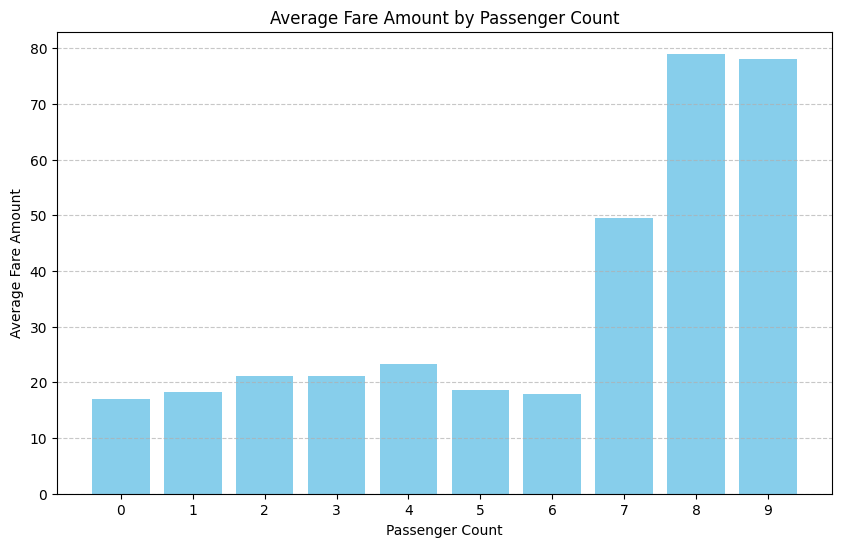

In [5]:
average_fare_by_passenger = total_df.groupby('passenger_count')['fare_amount'].mean().reset_index()

average_fare_by_passenger['passenger_count'] = average_fare_by_passenger['passenger_count'].astype(int)
average_fare_by_passenger['fare_amount'] = average_fare_by_passenger['fare_amount'].round(2)
print(average_fare_by_passenger)

plt.figure(figsize=(10, 6))
plt.bar(average_fare_by_passenger['passenger_count'], average_fare_by_passenger['fare_amount'], color='skyblue')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Passenger Count')
plt.xticks(average_fare_by_passenger['passenger_count'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3. What is the most common payment type used by passengers

   Payment Type     Count
0             1  17364598
1             2   3227644
2             0   2254974
3             4    403696
4             3    158080
5             5         4


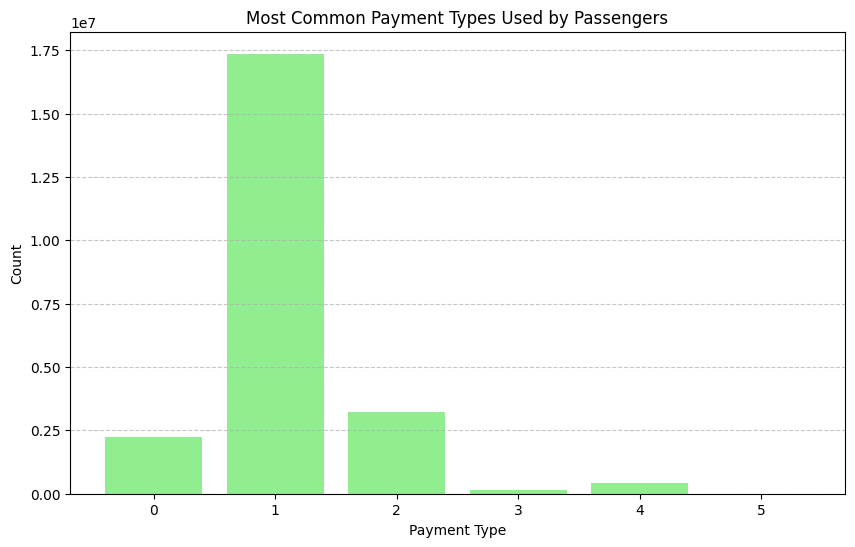

In [14]:
payment_type_counts = total_df['payment_type'].value_counts().reset_index()
payment_type_counts.columns = ['Payment Type', 'Count']

print(payment_type_counts)

plt.figure(figsize=(10, 6))
plt.bar(payment_type_counts['Payment Type'], payment_type_counts['Count'], color='lightgreen')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Most Common Payment Types Used by Passengers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4. Is there a correlation between trip distance and tip amount

0.55


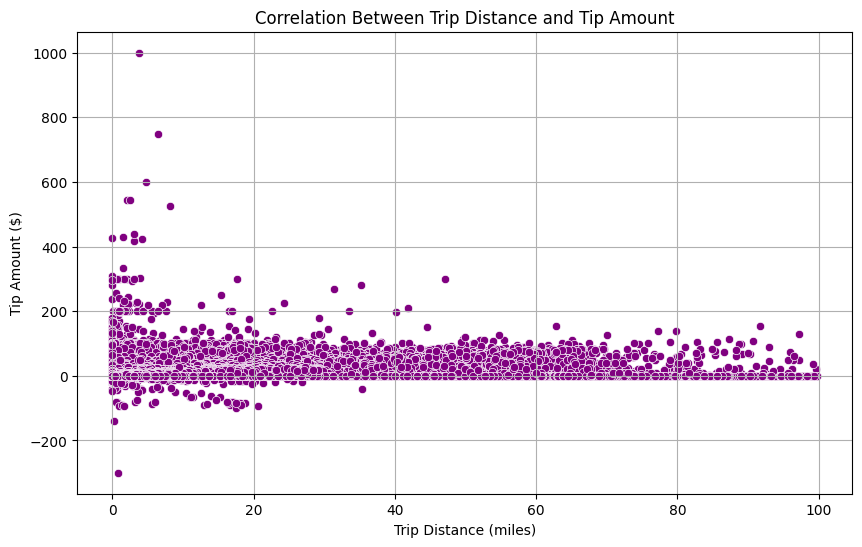

In [6]:
# only trips within 100 miles are counted
valid_df = total_df[total_df['trip_distance'] <= 100]
correlation = valid_df['trip_distance'].corr(valid_df['tip_amount'])

print(correlation.round(2))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=valid_df, color='purple')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.title('Correlation Between Trip Distance and Tip Amount')
plt.grid(True)
plt.show()

### 5. Which hours of the day see the highest number of pickups

    Hour  Pickup Count
0      0        673104
1      1        437792
2      2        285665
3      3        188944
4      4        138171
5      5        148006
6      6        330365
7      7        646670
8      8        902440
9      9        984098
10    10       1048285
11    11       1137769
12    12       1249079
13    13       1299653
14    14       1391029
15    15       1422817
16    16       1445173
17    17       1589449
18    18       1671734
19    19       1466943
20    20       1323434
21    21       1367973
22    22       1275954
23    23        984449


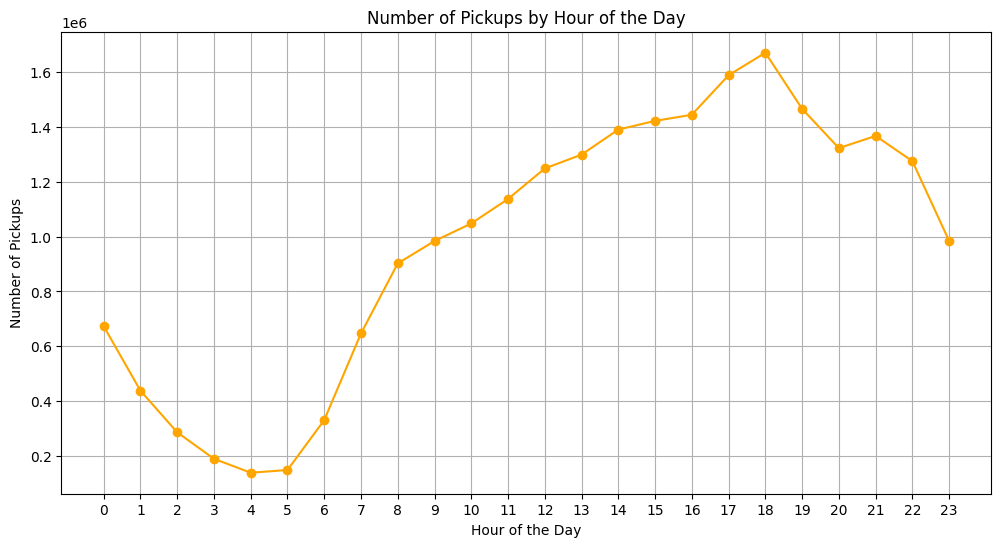

In [11]:
total_df['pickup_hour'] = pd.to_datetime(total_df['tpep_pickup_datetime']).dt.hour

pickup_counts_by_hour = total_df['pickup_hour'].value_counts().sort_index().reset_index()
pickup_counts_by_hour.columns = ['Hour', 'Pickup Count']

print(pickup_counts_by_hour)

plt.figure(figsize=(12, 6))
plt.plot(pickup_counts_by_hour['Hour'], pickup_counts_by_hour['Pickup Count'], marker='o', linestyle='-', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Number of Pickups by Hour of the Day')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

### 6. How do total amounts vary between trips with and without congestion surcharges

   Congestion Surcharge  Average Total Amount
0                 False                 31.35
1                  True                 26.69


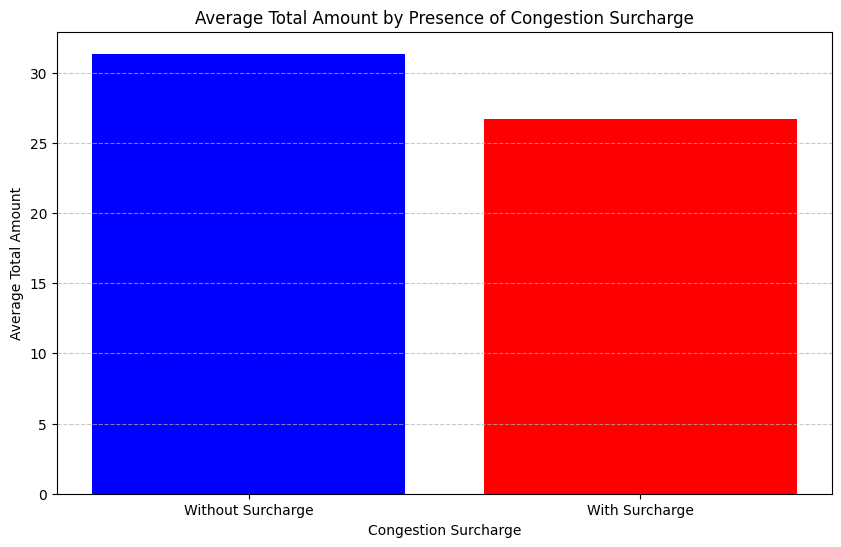

In [8]:

total_df['surcharge_present'] = total_df['congestion_surcharge'] > 0

total_amount_variation = total_df.groupby('surcharge_present')['total_amount'].mean().reset_index()
total_amount_variation.columns = ['Congestion Surcharge', 'Average Total Amount']
total_amount_variation['Average Total Amount'] = total_amount_variation['Average Total Amount'].round(2)

print(total_amount_variation)

plt.figure(figsize=(10, 6))
plt.bar(['Without Surcharge', 'With Surcharge'], total_amount_variation['Average Total Amount'], color=['blue', 'red'])
plt.xlabel('Congestion Surcharge')
plt.ylabel('Average Total Amount')
plt.title('Average Total Amount by Presence of Congestion Surcharge')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 7. What is the distribution of trip distances across different times of the day

C:\Users\sunsh\AppData\Local\Temp\ipykernel_17060\4018749754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['pickup_hour'] = pd.to_datetime(valid_df['tpep_pickup_datetime']).dt.hour
C:\Users\sunsh\AppData\Local\Temp\ipykernel_17060\4018749754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['time_of_day'] = pd.cut(valid_df['pickup_hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)
C:\Users\sunsh\AppData\Local\Temp\ipykernel_17060\4018

                 count      mean       std  min   25%   50%   75%   max
time_of_day                                                            
Night        1712245.0  2.615457  2.142647  0.0  1.10  1.93  3.51  10.0
Morning      4637325.0  2.186413  1.960816  0.0  0.95  1.57  2.60  10.0
Afternoon    7682391.0  2.115175  1.924487  0.0  0.91  1.50  2.50  10.0
Evening      7530201.0  2.336803  1.962936  0.0  1.04  1.71  2.91  10.0


<Figure size 1200x800 with 0 Axes>

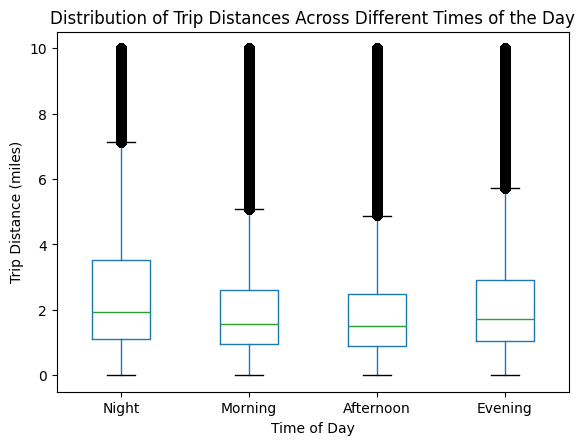

In [15]:
# only trips within 10 miles are counted
valid_df = total_df[total_df['trip_distance'] <= 10]
valid_df['pickup_hour'] = pd.to_datetime(valid_df['tpep_pickup_datetime']).dt.hour
valid_df['time_of_day'] = pd.cut(valid_df['pickup_hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

trip_distance_distribution = valid_df.groupby('time_of_day')['trip_distance'].describe()

print(trip_distance_distribution)

# Plotting the distribution of trip distances across different times of the day
plt.figure(figsize=(12, 8))
valid_df.boxplot(column='trip_distance', by='time_of_day', grid=False)
plt.xlabel('Time of Day')
plt.ylabel('Trip Distance (miles)')
plt.title('Distribution of Trip Distances Across Different Times of the Day')
plt.suptitle('')
plt.show()

### 8. What is the percentage of airport rides

7.78


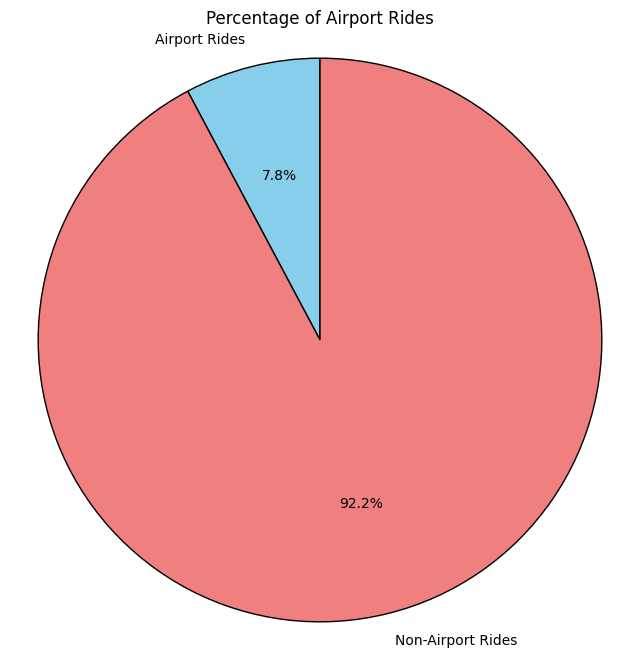

In [9]:
total_df['is_airport_ride'] = total_df['Airport_fee'] > 0
airport_ride_count = total_df['is_airport_ride'].sum()
non_airport_ride_count = len(total_df) - airport_ride_count
airport_ride_percentage = (airport_ride_count / len(total_df)) * 100

print(airport_ride_percentage.round(2))

labels = ['Airport Rides', 'Non-Airport Rides']
sizes = [airport_ride_count, non_airport_ride_count]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage of Airport Rides')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

### 9. What is the trend in the total number of trips over time (e.g., daily, monthly)

      Month  Trip Count
0   2002-12          10
1   2008-12           5
2   2009-01          12
3   2023-12          10
4   2024-01     2964617
5   2024-02     3007533
6   2024-03     3582611
7   2024-04     3514295
8   2024-05     3723843
9   2024-06     3539170
10  2024-07     3076859
11  2024-08          29
12  2026-06           2


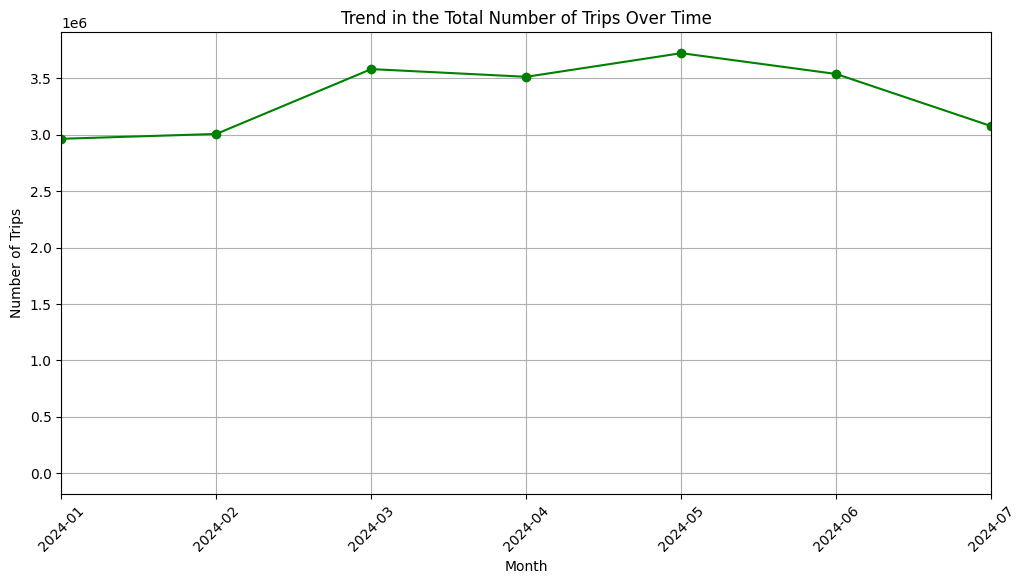

In [20]:
total_df['month_year'] = pd.to_datetime(total_df['tpep_pickup_datetime']).dt.to_period('M')

monthly_trip_counts = total_df['month_year'].value_counts().sort_index().reset_index()
monthly_trip_counts.columns = ['Month', 'Trip Count']

print(monthly_trip_counts)

plt.figure(figsize=(12, 6))
plt.plot(monthly_trip_counts['Month'].astype(str), monthly_trip_counts['Trip Count'], marker='o', linestyle='-', color='green')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trend in the Total Number of Trips Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.xlim(['2024-01', '2024-07'])
plt.show()

### 10. Which factors (e.g., trip distance, time of day) most significantly influence the fare amount

C:\Users\sunsh\AppData\Local\Temp\ipykernel_17060\1432516468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['pickup_hour'] = pd.to_datetime(valid_df['tpep_pickup_datetime']).dt.hour


                 trip_distance  pickup_hour  passenger_count  fare_amount
trip_distance         1.000000    -0.012127         0.042365     0.211970
pickup_hour          -0.012127     1.000000         0.024981    -0.001141
passenger_count       0.042365     0.024981         1.000000     0.011469
fare_amount           0.211970    -0.001141         0.011469     1.000000


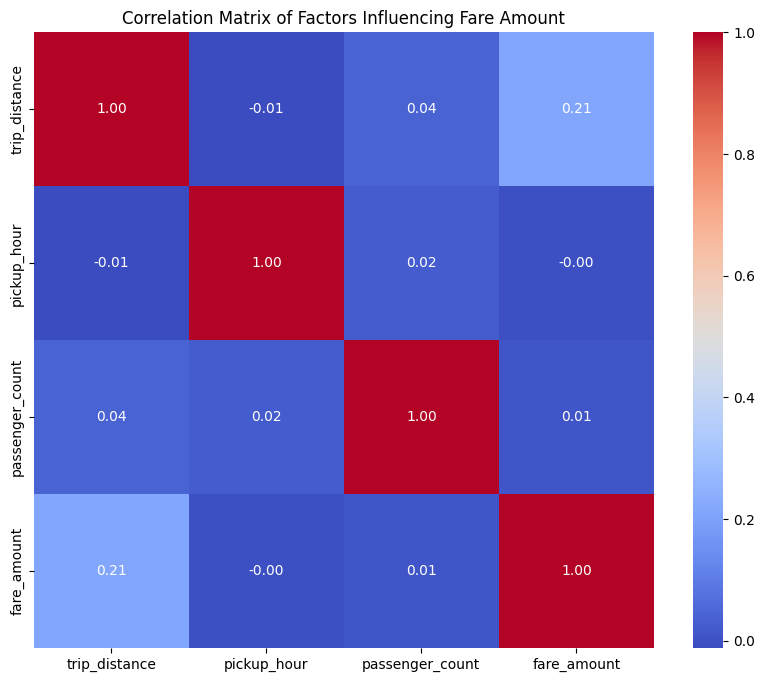

In [27]:
# only trips within 100 miles are counted
valid_df = total_df[total_df['trip_distance'] <= 100]
valid_df['pickup_hour'] = pd.to_datetime(valid_df['tpep_pickup_datetime']).dt.hour

correlation_data = valid_df[['trip_distance', 'pickup_hour', 'passenger_count', 'fare_amount']]
correlation_matrix = correlation_data.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Factors Influencing Fare Amount')
plt.show()

## Advanced Problems